In [118]:
import os
import pandas as pd

In [119]:
df_labels = pd.read_csv("data/medical_tc_labels.csv")
df_labels.loc[df_labels['condition_label'] == 5, 'condition_label'] = 0
df_labels

,condition_label,condition_name
0,1,neoplasms
1,2,digestive system diseases
2,3,nervous system diseases
3,4,cardiovascular diseases
4,0,general pathological conditions


In [120]:
df_balanced = pd.read_csv(os.path.join("prompts", "Balanced_GPT_input.csv"))
df_balanced = df_balanced[['medical_abstract', 'condition_label']]
df_balanced_updated = pd.merge(df_balanced, df_labels, on='condition_label')
df_balanced_updated = df_balanced_updated[['medical_abstract', 'condition_name']]
df_balanced_updated['medical_abstract'] = df_balanced_updated['medical_abstract'].str.strip()
df_balanced_updated['medical_abstract'] = df_balanced_updated['medical_abstract'].str.lower()
df_balanced_updated.shape

(100, 2)

In [121]:
df_unbalanced = pd.read_csv(os.path.join("prompts", "Unbalanced_GPT_input.csv"))
df_unbalanced = df_unbalanced[['medical_abstract', 'condition_label']]
df_unbalanced_updated = pd.merge(df_unbalanced, df_labels, on='condition_label')
df_unbalanced_updated = df_unbalanced_updated[['medical_abstract', 'condition_name']]
df_unbalanced_updated['medical_abstract'] = df_unbalanced_updated['medical_abstract'].str.strip()
df_unbalanced_updated['medical_abstract'] = df_unbalanced_updated['medical_abstract'].str.lower()
df_unbalanced_updated.sample(5)

,medical_abstract,condition_name
41,squamous cell carcinomas often produce more th...,neoplasms
45,intestinal pseudoobstruction secondary to amyl...,digestive system diseases
10,neurologic complications of alcoholism. neurol...,nervous system diseases
91,can nurses perform surgical cricothyrotomy wit...,general pathological conditions
71,fasciculations due to verapamil in a patient w...,general pathological conditions


In [122]:
df_unbalanced_examples = pd.read_csv(os.path.join("prompts", "Unbalanced_GPT_input_with_examples.csv"))
df_unbalanced_examples = df_unbalanced_examples[['medical_abstract', 'condition_label']]
df_unbalanced_examples_updated = pd.merge(df_unbalanced_examples, df_labels, on='condition_label')
df_unbalanced_examples_updated = df_unbalanced_examples_updated[['medical_abstract', 'condition_name']]
df_unbalanced_examples_updated['medical_abstract'] = df_unbalanced_examples_updated['medical_abstract'].str.strip()
df_unbalanced_examples_updated['medical_abstract'] = df_unbalanced_examples_updated['medical_abstract'].str.lower()
df_unbalanced_examples_updated.shape

(100, 2)

In [123]:
results_path = os.path.join("chat_gpt_output", "Balanced")
files = os.listdir(results_path)
df_balanced_output = pd.DataFrame()
files = sorted(files, key=lambda x: int(x.split(".")[0]))
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(results_path, file)
        df_file_result = pd.read_csv(file_path)
        df_balanced_output = pd.concat([df_balanced_output, df_file_result], ignore_index=True)
df_balanced_output.columns = ['medical_abstract', 'condition_name_output']
df_balanced_output['medical_abstract'] = df_balanced_output['medical_abstract'].str.strip()
df_balanced_output['medical_abstract'] = df_balanced_output['medical_abstract'].str.lower()
df_balanced_output['condition_name_output'] = df_balanced_output['condition_name_output'].str.lower()
df_balanced_output.shape

(100, 2)

In [124]:
results_path_unbalanced = os.path.join("chat_gpt_output", "Unbalanced")
files = os.listdir(results_path_unbalanced)
df_unbalanced_output = pd.DataFrame()
files = sorted(files, key=lambda x: int(x.split(".")[0]))
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(results_path_unbalanced, file)
        df_file_result = pd.read_csv(file_path)
        df_unbalanced_output = pd.concat([df_unbalanced_output, df_file_result], ignore_index=True)
df_unbalanced_output.columns = ['medical_abstract', 'condition_name_output']
df_unbalanced_output['medical_abstract'] = df_unbalanced_output['medical_abstract'].str.strip()
df_unbalanced_output['medical_abstract'] = df_unbalanced_output['medical_abstract'].str.lower()
df_unbalanced_output['condition_name_output'] = df_unbalanced_output['condition_name_output'].str.lower()
df_unbalanced_output.shape

(100, 2)

In [125]:
results_path_unbalanced_with_example = os.path.join("chat_gpt_output", "Unbalanced_with_example")
files = os.listdir(results_path_unbalanced_with_example)
df_unbalanced_output_with_examples = pd.DataFrame()
files = sorted(files, key=lambda x: int(x.split(".")[0]))
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(results_path_unbalanced_with_example, file)
        df_file_result = pd.read_csv(file_path)
        df_unbalanced_output_with_examples = pd.concat([df_unbalanced_output_with_examples, df_file_result], ignore_index=True)
df_unbalanced_output_with_examples.columns = ['medical_abstract', 'condition_name_output']
df_unbalanced_output_with_examples['medical_abstract'] = df_unbalanced_output_with_examples['medical_abstract'].str.strip()
df_unbalanced_output_with_examples['medical_abstract'] = df_unbalanced_output_with_examples['medical_abstract'].str.lower()
df_unbalanced_output_with_examples['condition_name_output'] = df_unbalanced_output_with_examples['condition_name_output'].str.lower()
df_unbalanced_output_with_examples.shape

(100, 2)

In [126]:
df_merge = pd.merge(df_balanced_updated, df_balanced_output, left_index=True, right_index=True, how='right')
df_merge.sample(3)

,medical_abstract_x,condition_name,medical_abstract_y,condition_name_output
50,expression of class ii molecules on intestinal...,neoplasms,expression of class ii molecules on intestinal...,digestive system diseases
0,future directions in vasodilator therapy for h...,cardiovascular diseases,future directions in vasodilator therapy for h...,cardiovascular diseases
22,biopsy of the breast for mammographically dete...,neoplasms,biopsy of the breast for mammographically dete...,neoplasms


In [127]:
df_merge_unbalanced = pd.merge(df_unbalanced_updated, df_unbalanced_output, left_index=True, right_index=True, how='right')
df_merge_unbalanced.sample(3)

,medical_abstract_x,condition_name,medical_abstract_y,condition_name_output
46,late effects of paralytic poliomyelitis in olm...,nervous system diseases,late effects of paralytic poliomyelitis in olm...,nervous system diseases
88,arrhythmias in patients with chf. should they ...,cardiovascular diseases,arrhythmias in patients with chf. should they ...,cardiovascular diseases
12,nasal midline masses in infants and children. ...,nervous system diseases,nasal midline masses in infants and children...,neoplasms


In [128]:
df_merge_unbalanced_with_examples = pd.merge(
    df_unbalanced_examples_updated, df_unbalanced_output_with_examples, left_index=True, right_index=True, how='inner'
)
df_merge_unbalanced_with_examples.sample(3)

,medical_abstract_x,condition_name,medical_abstract_y,condition_name_output
59,"the relationship of ""high risk"" mammographic p...",neoplasms,the relationship of high‑risk mammographic pat...,neoplasms
47,heterotopic tissue in lymph nodes. an unrecogn...,general pathological conditions,heterotopic tissue in lymph nodes. an unrecogn...,general pathological conditions
80,paf-acether synthesis by helicobacter pylori. ...,digestive system diseases,paf-acether synthesis by helicobacter pylori...,digestive system diseases


In [129]:
from sklearn.metrics import classification_report
report_dict_balanced = classification_report(df_merge['condition_name'], df_merge['condition_name_output'])
print(report_dict_balanced)

                                 precision    recall  f1-score   support

        cardiovascular diseases       0.75      0.90      0.82        20
      digestive system diseases       0.79      0.75      0.77        20
general pathological conditions       0.50      0.40      0.44        20
                      neoplasms       0.81      0.85      0.83        20
        nervous system diseases       0.80      0.80      0.80        20

                       accuracy                           0.74       100
                      macro avg       0.73      0.74      0.73       100
                   weighted avg       0.73      0.74      0.73       100



In [130]:
report_dict_unbalanced = classification_report(df_merge_unbalanced['condition_name'], df_merge_unbalanced['condition_name_output'])
print(report_dict_unbalanced)

                                 precision    recall  f1-score   support

        cardiovascular diseases       0.69      0.95      0.80        21
      digestive system diseases       0.69      0.90      0.78        10
general pathological conditions       0.61      0.45      0.52        31
                      neoplasms       0.80      0.73      0.76        22
        nervous system diseases       0.73      0.69      0.71        16

                       accuracy                           0.70       100
                      macro avg       0.70      0.74      0.71       100
                   weighted avg       0.70      0.70      0.69       100



In [131]:
report_dict_unbalanced = classification_report(df_merge_unbalanced_with_examples['condition_name'], df_merge_unbalanced_with_examples['condition_name_output'])
print(report_dict_unbalanced)

                                 precision    recall  f1-score   support

        cardiovascular diseases       0.67      0.78      0.72        23
      digestive system diseases       0.83      0.77      0.80        13
general pathological conditions       0.65      0.46      0.54        28
                      neoplasms       0.82      0.86      0.84        21
        nervous system diseases       0.68      0.87      0.76        15

                       accuracy                           0.72       100
                      macro avg       0.73      0.75      0.73       100
                   weighted avg       0.72      0.72      0.71       100



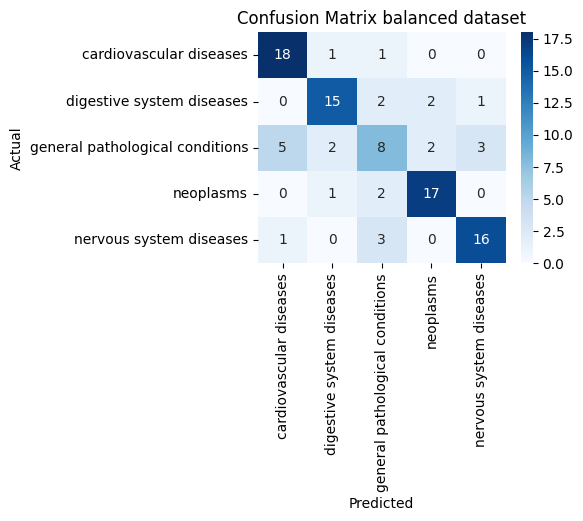

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_df = pd.crosstab(df_merge['condition_name'], df_merge['condition_name_output'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix balanced dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

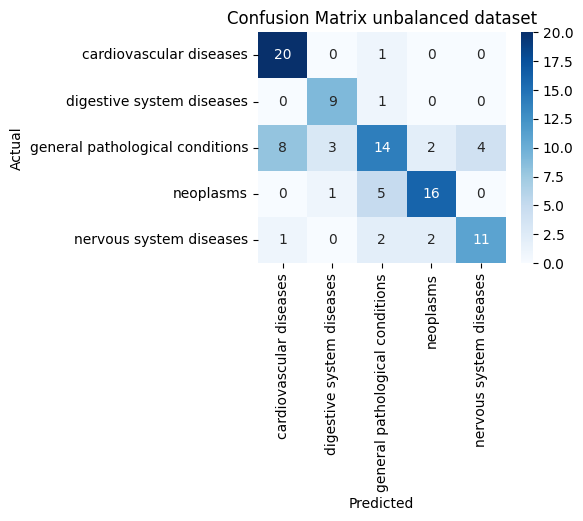

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_df_unbalanced = pd.crosstab(df_merge_unbalanced['condition_name'], df_merge_unbalanced['condition_name_output'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_df_unbalanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix unbalanced dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

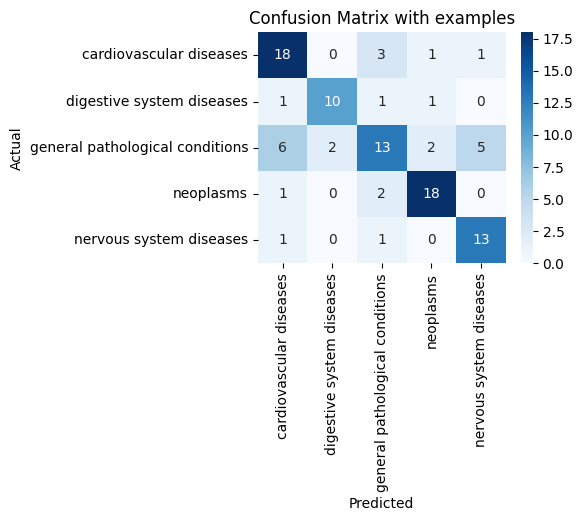

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_df_unbalanced_examples = pd.crosstab(df_merge_unbalanced_with_examples['condition_name'], df_merge_unbalanced_with_examples['condition_name_output'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_df_unbalanced_examples, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with examples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()